# Time Series EDA

What is it?
- multiple different visualizations for exploring time series data

Why do we care?
- allows us to identify trend and seasonality

#### Topics
- Time Series Train-Test Split
    - Cross Validate Splits
    - Percentage Based
    - Human-based


- 10 Weird Time Series Visualizations to Impress Your Friends and Family
    1. Blow off the time series
    1. Target over time
    1. Target averaged over various periods over time
    1. Change in target over time
    1. Seasonal Plot
    1. Seasonal Subseries Plot
    1. Lag Plot
    1. Autocorrelation Plot
    1. Seasonal Decomposition
    1. Area Plots
    
    
- Aside: working with dates in matplotlib
- Aside: `strftime`

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# plotting defaults
plt.rc('figure', figsize=(10, 5))
# plt.rc('font', size=12)

Scenario: We'll be looking at temperature data for san antonio from late 2012 to late 2017.



In [2]:
url = 'https://gist.githubusercontent.com/ryanorsinger/\
0ec766c66f4089bdcbc1d4fb294a3394/raw/197c1f0d7b55a45f29437811bc73d9c4ef8af647/sa_temps.csv'
df = pd.read_csv(url, index_col='datetime', parse_dates=True).sort_index()

In [3]:
df.head()

,temp
datetime,
2012-10-01 13:00:00,289.290000
2012-10-01 14:00:00,289.303649
2012-10-01 15:00:00,289.338497
2012-10-01 16:00:00,289.373345
2012-10-01 17:00:00,289.408193


We'll need to convert from Kelvin to Fahrenheit.

        °F = (K - 273.15) x 1.8000 + 32.00

In [4]:
# converting the units of the data we are ingesting
df.temp = (df.temp - 273.15) * 1.8 + 32

In [5]:
df.head()

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747


In [6]:
print('Date Range:', df.index.min(), 'to', df.index.max())

Date Range: 2012-10-01 13:00:00 to 2017-11-30 00:00:00


In [7]:
df.shape

(45252, 1)

## Data Splitting

**seasonality**: a repeated cycle in the data. Occurs at a fixed frequency. In our weather data there is yearly and daily seasonality

**trend**: long term upwards or downwards movement

**cycle**: Some arbitrary chunk of time, usually longer than a season, or consists of multiple seasons

Ideally all splits contain a season

- Cross-validation-based: Break data into slices and use successive slices as train and test repeatedly
- Percentage-based: A cutoff is selected arbitrarily (ex: use the last 20% of observations as Test)
- Human-based: Using domain knowledge, a cutoff is selected. (ex: use the last year as Test)

### Cross-validation-based

In [8]:
'sklearn.model_selection.TimeSeriesSplit'

'sklearn.model_selection.TimeSeriesSplit'

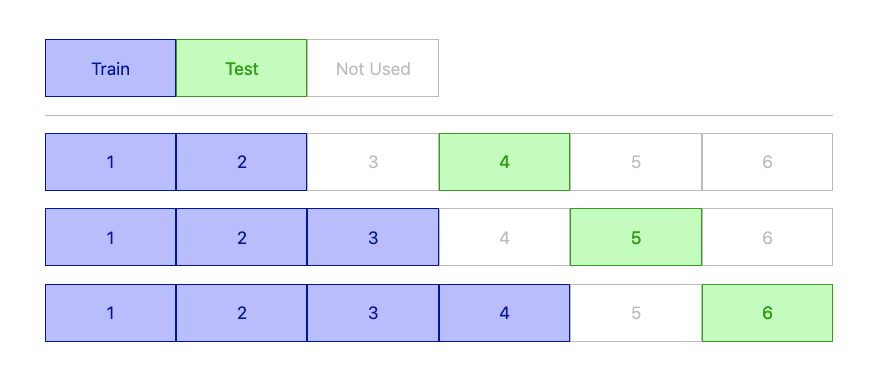

### Percentage-Based

We will set a percentage of our data to use as the train. 

In [9]:
train_size = 0.70 
n = df.shape[0] 
test_start_index = round(train_size * n) 
test_start_index

31676

In [10]:
train = df.iloc[:test_start_index] #end at test_start_index
test = df.iloc[test_start_index:]  #start at the test_start_index

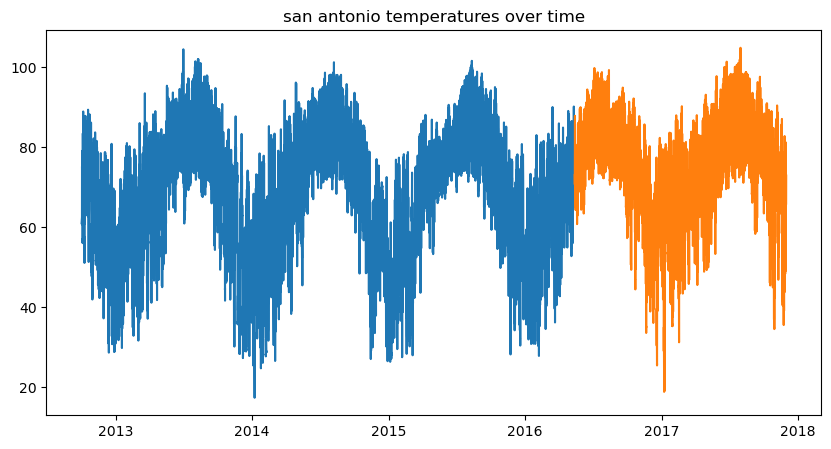

In [11]:
plt.plot(train.temp)
plt.plot(test.temp)
plt.title('san antonio temperatures over time')
plt.show()

#below blue is train data, orange is test

### Human-Based

We will be splitting based on our human knowledge! 

In [12]:
df.head()

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747


In [13]:
train = df.loc[:'2016'].copy() #everything up to 2016
test = df.loc['2017'].copy() #all of 2017

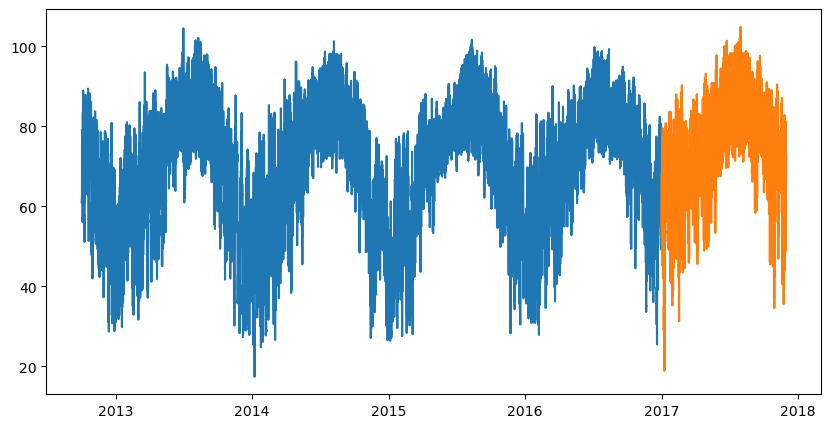

In [14]:
plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)
plt.show()

#test would be only 2017

## Visualizations

My target variable is the temperture

In [15]:
y = train.temp
y.head()

datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
Name: temp, dtype: float64

### 1. Blow off the time series

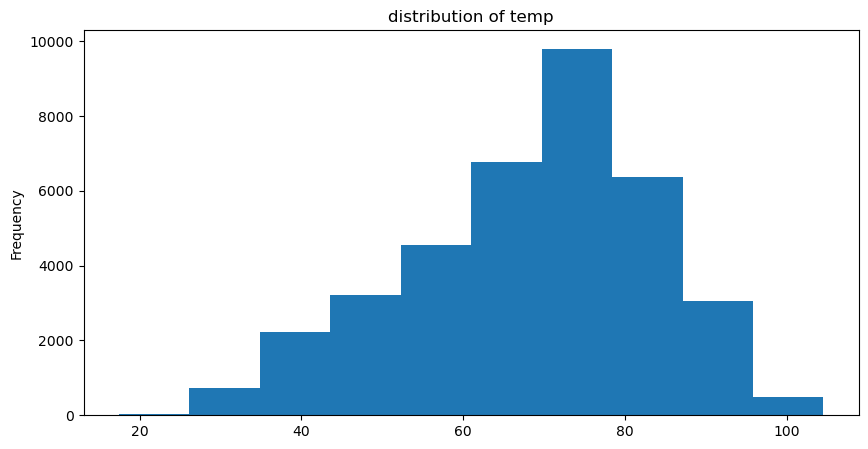

In [16]:
train.temp.plot.hist()
plt.title('distribution of temp')
plt.show()

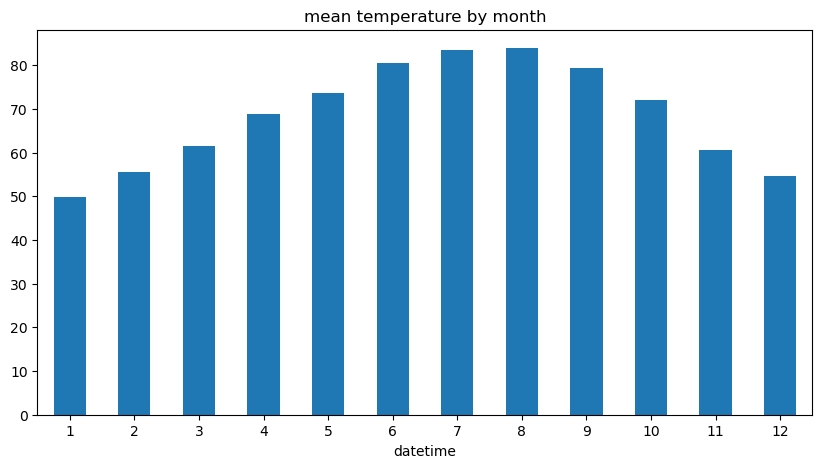

In [17]:
train.groupby(train.index.month).temp.mean()\
.plot.bar().tick_params('x', rotation=0)

plt.title('mean temperature by month')
plt.show()

In [18]:
# assign a weekday column from the day_name() method on the datetime index
train['weekday'] = train.index.day_name()
train['day_num'] = train.index.day_of_week

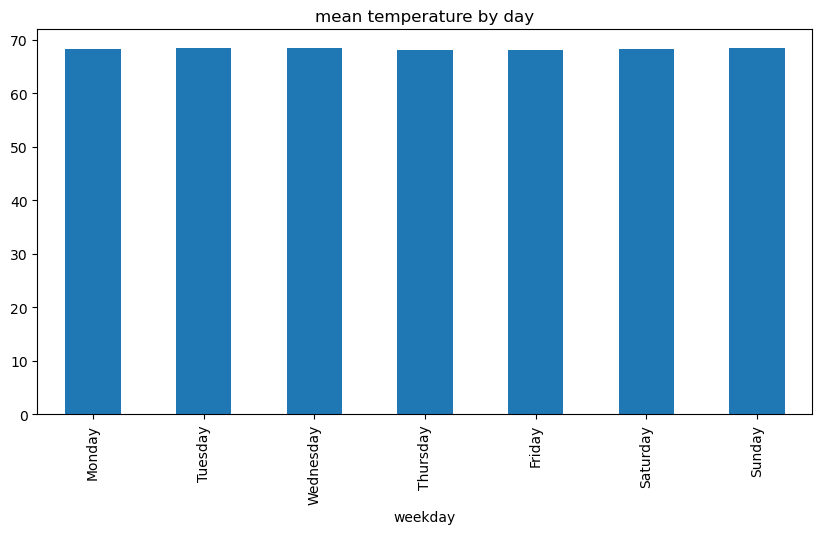

In [19]:
# aggregate on that weekday
train.groupby('weekday').mean().sort_values('day_num').temp.plot.bar()

plt.title('mean temperature by day')
plt.show()

### 2. target over time

In [20]:
train.columns

Index(['temp', 'weekday', 'day_num'], dtype='object')

In [21]:
y.head()

datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
Name: temp, dtype: float64

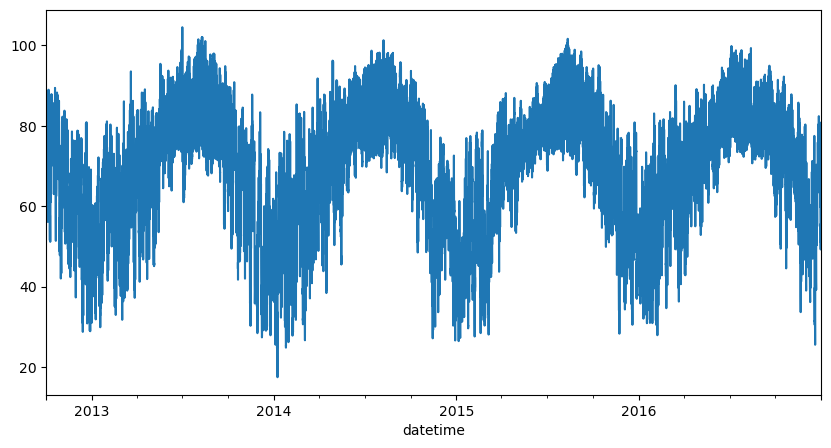

In [22]:
y.plot();

### 3. target averaged over various periods over time

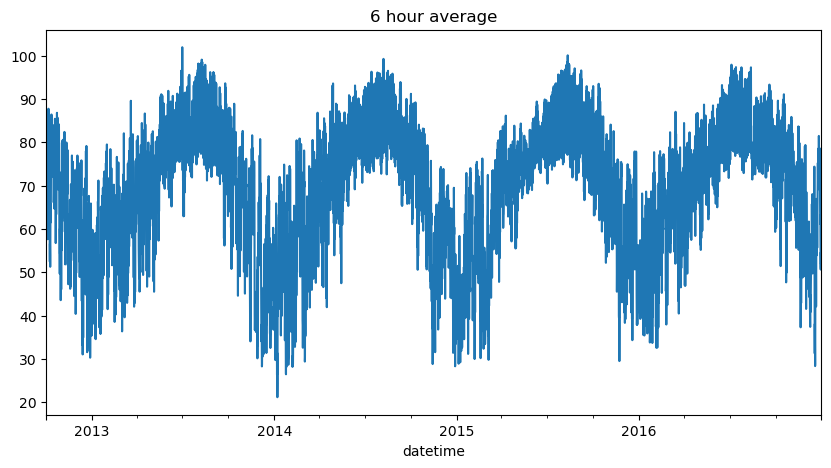

In [23]:
# 

y.resample('6H').mean().plot(title='6 hour average');

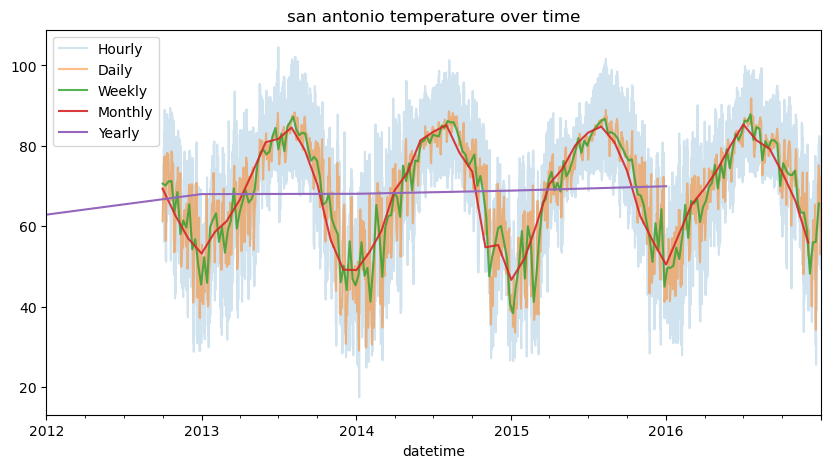

In [24]:
y.plot(alpha=0.2, label='Hourly')

y.resample('D').mean().plot(alpha=0.5, label='Daily')
y.resample('W').mean().plot(alpha=0.8, label='Weekly')
y.resample('M').mean().plot(alpha=0.9, label='Monthly')
y.resample('Y').mean().plot(label='Yearly')

plt.title('san antonio temperature over time')
plt.legend()
plt.show()

### 4. change in target over time

.diff will allow us to get deltas between values

#### look at the difference in data by week
- resample the data by week, get the average for that week
- make the difference utilizing .diff()
- plot the changes over time in order to examine volatility

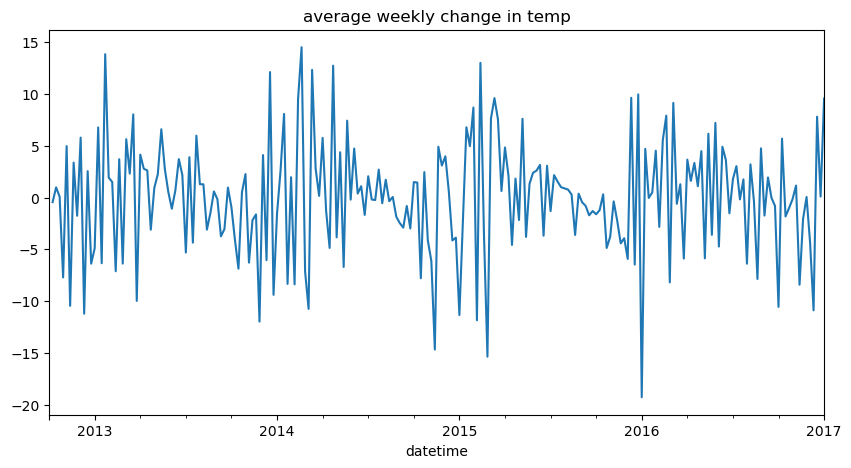

In [25]:
y.resample('W').mean().diff().plot(title='average weekly change in temp');

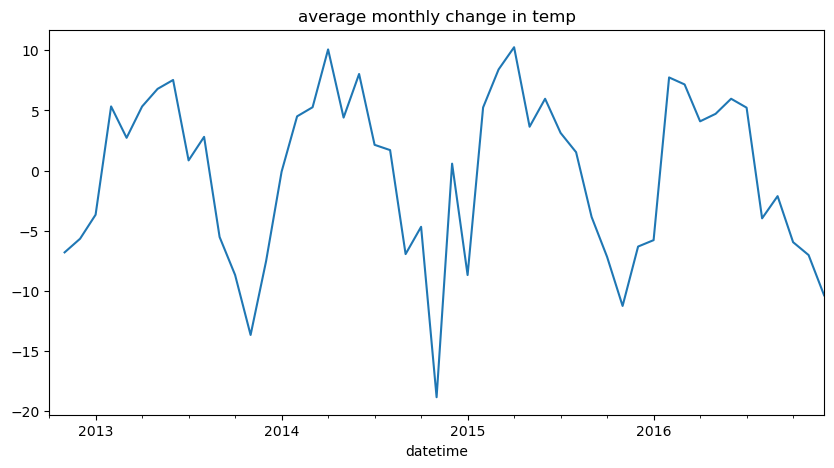

In [26]:

y.resample('M').mean().diff().plot(title='average monthly change in temp');

### 5. Seasonal Plot

shows the comparison of multiple seasons together

our example: one season is one year. multiple lines are shown to show multiple years.

- xaxis: month 
- yaxis: y
- color: year

In [27]:
y.groupby([y.index.year, y.index.month]).mean()[:6]

datetime  datetime
2012      10          69.318705
          11          62.521575
          12          56.860014
2013      1           53.192333
          2           58.522799
          3           61.244479
Name: temp, dtype: float64

#### `.unstack`
- unstack will make a pivot table of a second order index

In [28]:
y.groupby([y.index.year, y.index.month]).mean().unstack()

datetime,1,2,3,4,5,6,7,8,9,10,11,12
datetime,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.318705,62.521575,56.860014
2013,53.192333,58.522799,61.244479,66.569717,73.358529,80.885728,81.731819,84.534117,79.016805,70.343832,56.686028,49.165310
2014,49.072897,53.579080,58.842459,68.908933,73.311970,81.337658,83.476876,85.178102,78.238621,73.567252,54.735951,55.311824
2015,46.631940,51.874683,60.277705,70.526879,74.169747,80.135967,83.264325,84.789859,80.938208,73.766466,62.519181,56.207118
2016,50.427347,58.165749,65.323011,69.415316,74.129780,80.097570,85.325640,81.357023,79.233476,73.284788,66.265047,55.903224


In [29]:
# Transpose dataset, in this case, we turn the 0 index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0)

datetime,2012,2013,2014,2015,2016
datetime,,,,,
1,NaN,53.192333,49.072897,46.631940,50.427347
2,NaN,58.522799,53.579080,51.874683,58.165749
3,NaN,61.244479,58.842459,60.277705,65.323011
4,NaN,66.569717,68.908933,70.526879,69.415316
5,NaN,73.358529,73.311970,74.169747,74.129780
6,NaN,80.885728,81.337658,80.135967,80.097570
7,NaN,81.731819,83.476876,83.264325,85.325640
8,NaN,84.534117,85.178102,84.789859,81.357023
9,NaN,79.016805,78.238621,80.938208,79.233476


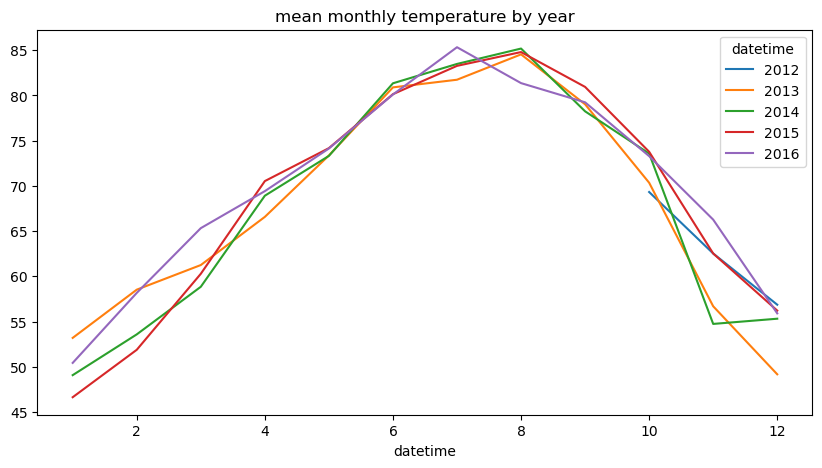

In [30]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()
plt.title('mean monthly temperature by year')
plt.show()



### 6. Seasonal Subseries Plot

Get every one of our months onto a it's own plots

In [31]:
# make my pivot table of years to month with unstack()
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

datetime,1,2,3,4,5,6,7,8,9,10,11,12
datetime,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.318705,62.521575,56.860014
2013,53.192333,58.522799,61.244479,66.569717,73.358529,80.885728,81.731819,84.534117,79.016805,70.343832,56.686028,49.165310
2014,49.072897,53.579080,58.842459,68.908933,73.311970,81.337658,83.476876,85.178102,78.238621,73.567252,54.735951,55.311824
2015,46.631940,51.874683,60.277705,70.526879,74.169747,80.135967,83.264325,84.789859,80.938208,73.766466,62.519181,56.207118
2016,50.427347,58.165749,65.323011,69.415316,74.129780,80.097570,85.325640,81.357023,79.233476,73.284788,66.265047,55.903224


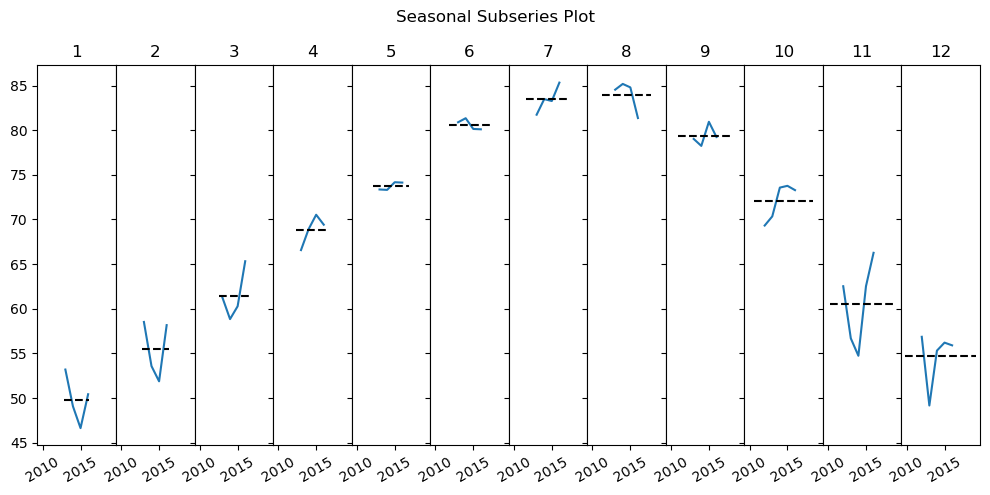

In [32]:
# unpacking my figure and axes elements, sharey allows all plots to share the same y axis, and sharex does teh same for x axis
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)

# for ax, (month, subset) 
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='') #how you avoid having repeating labels, without this repeats 'datetime'
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.tight_layout()
fig.subplots_adjust(wspace=0)

As with the monthly box plot, the seasonal pattern is quite evident in the seasonal subseries.
- Do the data exhibit a seasonal pattern?
- What is the nature of the seasonality?
- Is there a within-group pattern (e.g., do January and July exhibit similar patterns)?
- Are there any outliers once seasonality has been accounted for?

### 7. Lag Plot

A lag plot is a scatter plot of a series with itself, shifted, or lagged. Put another way, a lag plot measures one value against the next or previous value.

If your data is sampled daily, you could think of t as 'today', t+1 is 'tomorrow'. More generally, t is any given time period and t+1 is the time period after. If your data is sampled weekly, t is any given week, and t+1 is the following week.

A lag plot, also known as a lag scatter plot, is a graphical tool used in time series analysis to visualize the relationship between a variable and its lagged values. It helps identify any patterns, dependencies, or autocorrelation within the time series data.

In a lag plot, each data point in the original time series is plotted against its lagged value, which is the value of the variable at a previous time step. The lagged value can be from one or more time steps in the past. By examining the resulting scatter plot, you can gain insights into the temporal structure and autocorrelation of the time series.


Linearity: Lag plots can reveal linear relationships between the variable and its lagged values. If the data points in the plot are tightly clustered around a straight line, it indicates a linear relationship between the variable and its lagged values.

Non-linearity: Deviations from a straight line in the lag plot may suggest non-linear relationships or other patterns in the data. These deviations can indicate the presence of trends, cycles, or seasonality in the time series.

Outliers: Lag plots can help identify outliers or unusual data points that deviate significantly from the overall pattern. Outliers may appear as isolated points in the lag plot that do not conform to the general clustering or trend.

By examining the lag plot, you can gain insights into the temporal structure of the time series and make informed decisions regarding the choice of models, such as autoregressive (AR) or moving average (MA) models, which take into account the autocorrelation and dependencies within the data.

In [33]:
train['y(t + 1)'] = train.temp.shift(-1)
train.head()

,temp,weekday,day_num,y(t + 1)
datetime,,,,
2012-10-01 13:00:00,61.052000,Monday,0,61.076568
2012-10-01 14:00:00,61.076568,Monday,0,61.139294
2012-10-01 15:00:00,61.139294,Monday,0,61.202020
2012-10-01 16:00:00,61.202020,Monday,0,61.264747
2012-10-01 17:00:00,61.264747,Monday,0,61.327473


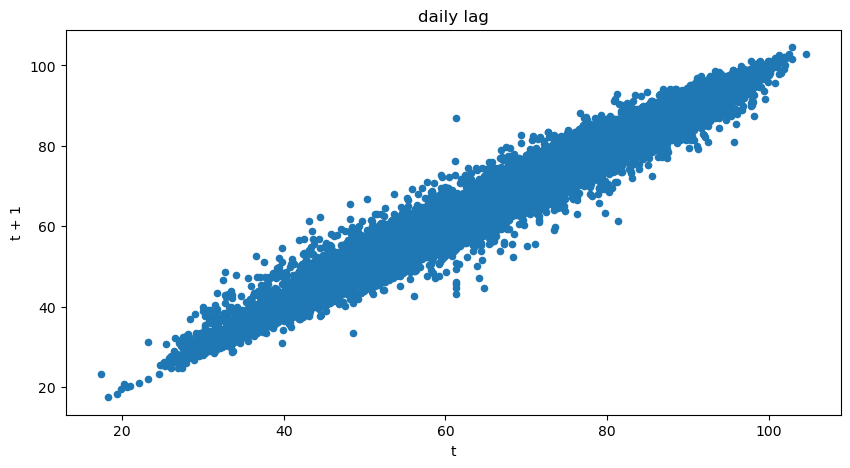

In [34]:
train.plot.scatter(x='temp', y='y(t + 1)').set(xlabel='t', ylabel='t + 1')
plt.title('daily lag')
plt.show()

looks like we have a pretty strong linear association between the hour now and the temperature for the next hour

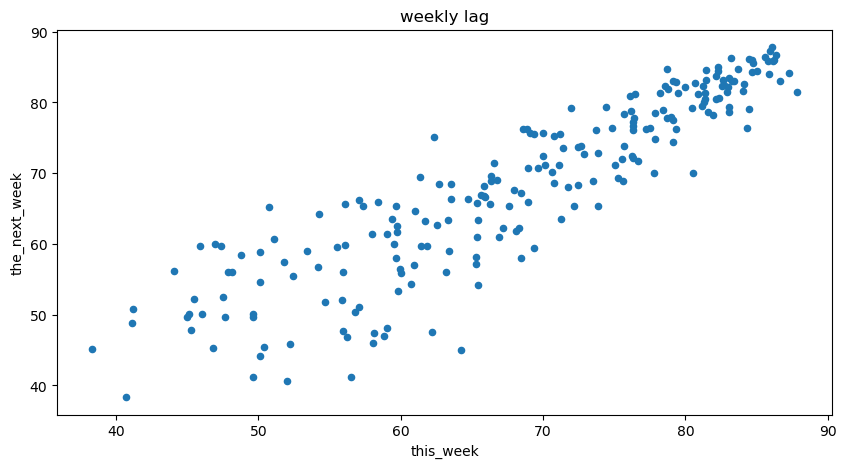

In [35]:
weekly = train.resample('W').mean().drop(columns='y(t + 1)')
weekly['the_next_week'] = weekly.temp.shift(-1)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
plt.title('weekly lag')
plt.show()

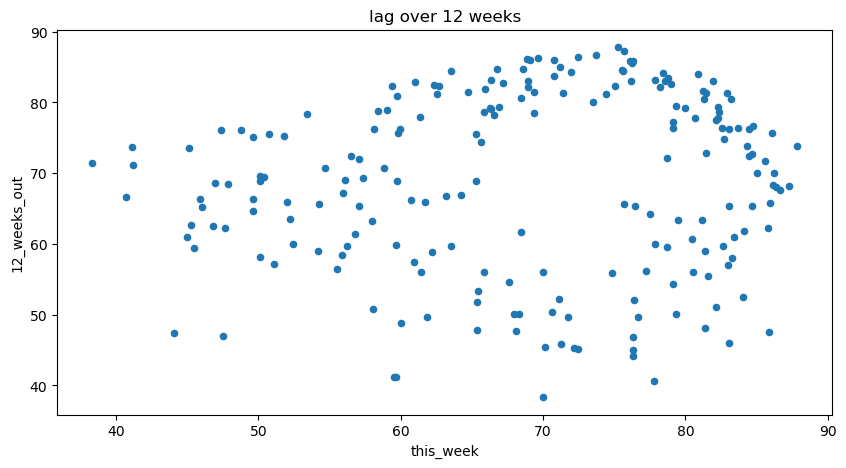

In [36]:
weekly  = train.resample('W').mean().drop(columns='y(t + 1)')
weekly['12_weeks_out'] = weekly.temp.shift(-12)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
plt.title('lag over 12 weeks')
plt.show()

#### use `pd.plotting.lag_plot` 

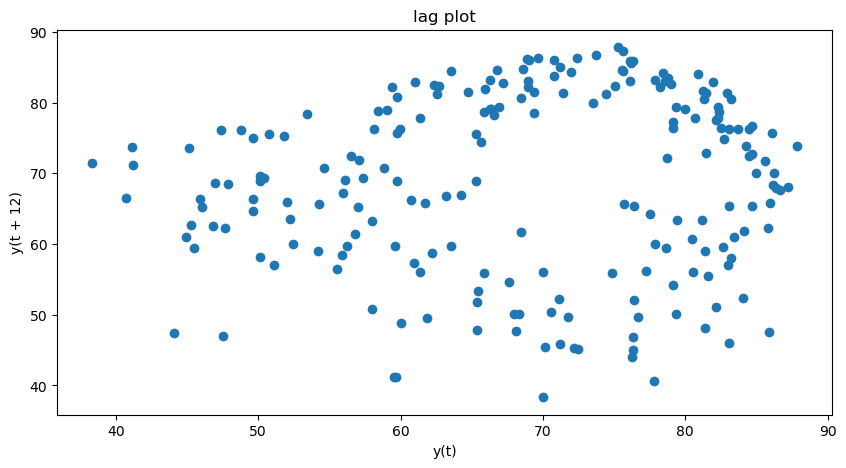

In [37]:
#same thing as above, but easier
pd.plotting.lag_plot(train.temp.resample('W').mean(), lag=12) 
plt.title('lag plot');

### 8. Autocorrelation Plot

**Autocorrelation** is a measure of the linear relationship between lagged values of a time series. An autocorrelation plot shows the correlation coefficient as a function of lag time.

Autocorrelation: Lag plots are useful for detecting autocorrelation, which is the correlation between the time series and its lagged values. If the data points in the lag plot cluster around a diagonal line (slope of 1), it suggests a strong positive autocorrelation. On the other hand, a lack of clustering or a dispersed pattern may indicate little or no autocorrelation.


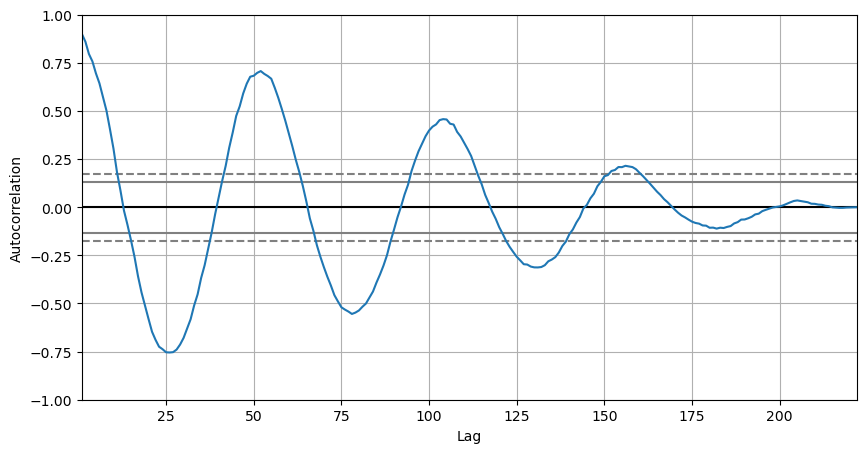

In [38]:
pd.plotting.autocorrelation_plot(train.temp.resample('W').mean())
plt.show()

This can help us identify seasonality by looking at the peaks and valleys of the resulting visualization. The peaks can tells us the frequency with which the seasonality repeats itself, and the valleys show us where the correlation is the most negative.

The dashed lines are a way measure whether the observed autocorrelation is a meaningful signal or just white noise. If the majority of the peaks and valleys fall within the dashed lines, the time series is probably white noise.

### 9. Seasonal Decomposition

Seasonal decomposition is a fancy way to say that we can model time series as having 3 seperate components, the seasonal repeated cycle, the long term trend, and random noise1. There are two types of seasonal decomposition models, additive and multiplicative.

#### data = Seasonality + Trend + Residual

In [39]:
import statsmodels.api as sm

In [40]:
y = train.temp.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)

In [41]:
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

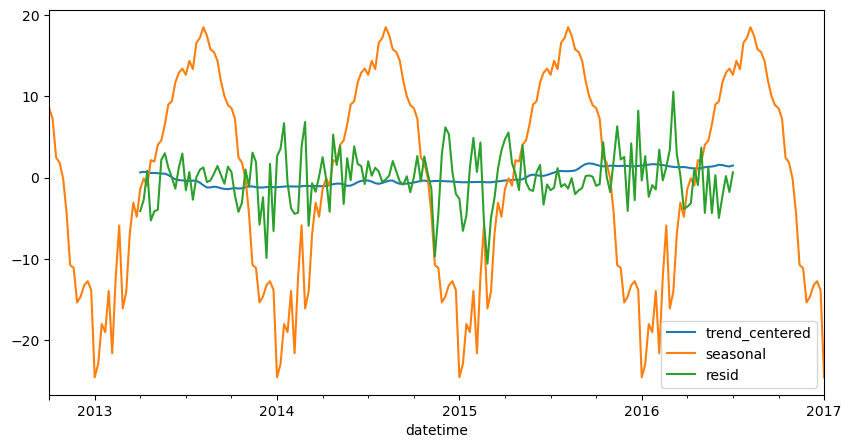

In [42]:
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

### 10 Area Plots

- can we visualize categories over time?

In [43]:
train.columns

Index(['temp', 'weekday', 'day_num', 'y(t + 1)'], dtype='object')

In [44]:
train = train.drop(columns=['y(t + 1)','weekday','day_num'])
train = train.resample('D').mean()
train

,temp
datetime,
2012-10-01,61.330942
2012-10-02,65.678822
2012-10-03,67.411250
2012-10-04,67.703750
2012-10-05,77.073125
...,...
2016-12-27,72.533750
2016-12-28,72.269000
2016-12-29,64.256000


In [45]:

train['temp_bin'] = pd.qcut(train.temp, 4, labels=['cold', 'cool', 'warm', 'hot'])


In [50]:
train.sample(10)

,temp,temp_bin
datetime,,
2015-10-23,75.833577,warm
2016-12-28,72.269000,warm
2015-03-06,38.009300,cold
2014-03-03,34.745750,cold
2013-12-17,49.220750,cold
2016-07-12,84.857435,hot
2015-09-27,77.168336,warm
2015-07-17,83.894750,hot
2016-07-20,91.808750,hot


In [47]:
train.groupby('temp_bin').resample('M').size()

temp_bin  datetime  
cold      2012-10-31     6
          2012-11-30    10
          2012-12-31    16
          2013-01-31    24
          2013-02-28    17
                        ..
hot       2016-06-30    19
          2016-07-31    28
          2016-08-31    21
          2016-09-30    18
          2016-10-31     5
Length: 195, dtype: int64

How is the distribution of temp_bin changing over time?

In [48]:
train.groupby('temp_bin').mean()

,temp
temp_bin,
cold,49.381699
cool,65.200219
warm,75.447977
hot,83.449087


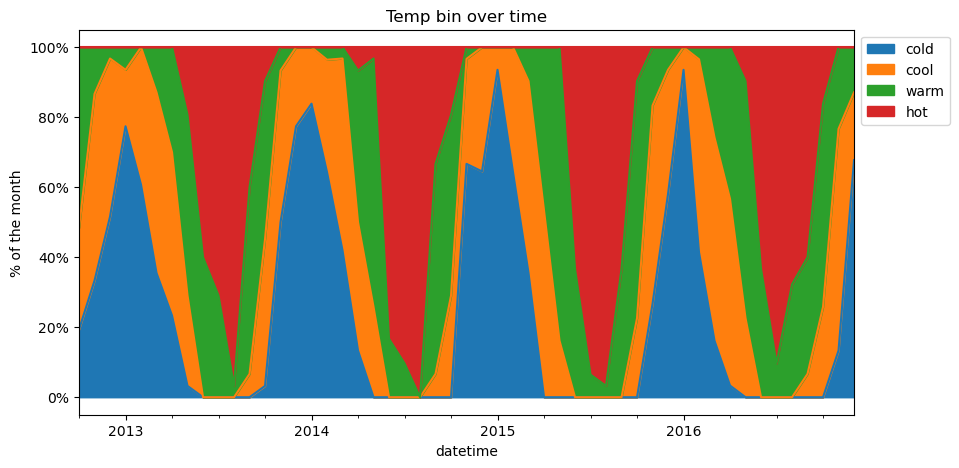

In [49]:
#will show the percentage of the timeframe when it was that temperature

ax = (
train.groupby('temp_bin')
 .resample('M') #to change granularity change this 'M'
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area(title='Temp bin over time', ylabel='% of the month'))
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax.yaxis.set_major_formatter('{:.0%}'.format)